# Mars Weather Analysis

In [11]:
# Import Splinter, BeautifulSoup, and Pandas
from splinter import Browser
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup as soup
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager

In [12]:
# Set the executable path and initialize Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [13]:
# Visit the weather website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [15]:
#make the list coming in from read_html to a dataframe for data analysis
dfs = pd.read_html(url)
df = dfs[0]
print(df)

        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


In [16]:
#see what datatypes are
df.dtypes
#note: terrestrial_date is a object- want it date

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [17]:
#make terrestrial date a date
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

# Q: How many months exist on Mars?

In [18]:
#answer to questions
#How many months exist on mars?
n = len(pd.unique(df['month']))
  
print("Count of Months on Mars :", 
      n)


Count of Months on Mars : 12


# Q: Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [19]:
#Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?
n = len(pd.unique(df['sol']))
  
print("Count of Martian Days in Dataset :", 
      n)

Count of Martian Days in Dataset : 1867


# Q: What are the coldest and the warmest months on Mars (at the location of Curiosity)?

In [20]:
#min and max temps for each month:
p=df.groupby('month').min_temp.max()
pdf=pd.DataFrame(p)
pdf.rename(columns={"min_temp": "Maximum Temp"}, inplace=True)
#print(pdf)
q=df.groupby('month').min_temp.min()
qdf=pd.DataFrame(q)

#rename min_temp for both
qdf.rename(columns={"min_temp": "Minimum Temp"}, inplace=True)
#print(qdf)
result = pd.merge(qdf, pdf, on="month")
print(result)

       Minimum Temp  Maximum Temp
month                            
1             -82.0         -62.0
2             -86.0         -76.0
3             -90.0         -77.0
4             -89.0         -77.0
5             -85.0         -74.0
6             -84.0         -71.0
7             -78.0         -65.0
8             -75.0         -63.0
9             -78.0         -63.0
10            -81.0         -66.0
11            -78.0         -67.0
12            -81.0         -70.0


 Coldest Month on Mars is Month 3 at -90.0
 Warmest Month on Mars is Month 1 at -62.0


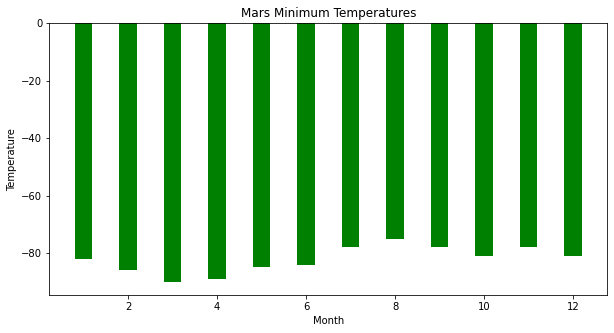

In [21]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)?
dfCold=df[['month', 'min_temp']].copy()
#create the barchart
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dfCold['month'], dfCold['min_temp'], color ='green',
        width = 0.4)
 
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Mars Minimum Temperatures")
print(f" Coldest Month on Mars is Month 3 at -90.0")
print(f" Warmest Month on Mars is Month 1 at -62.0")
plt.show()

#  Which months have the lowest and the highest atmospheric pressure on Mars? 

In [22]:
p=df.groupby('month').pressure.max()
pdf=pd.DataFrame(p)
pdf.rename(columns={"pressure": "Maximum Pressure"}, inplace=True)
#print(pdf)
q=df.groupby('month').pressure.min()
qdf=pd.DataFrame(q)

#rename min_temp for both
qdf.rename(columns={"pressure": "Minimum Pressure"}, inplace=True)
#print(qdf)
resultP = pd.merge(qdf, pdf, on="month")
print(resultP)

       Minimum Pressure  Maximum Pressure
month                                    
1                 820.0             888.0
2                 867.0             908.0
3                 833.0             907.0
4                 754.0             857.0
5                 727.0             777.0
6                 732.0             764.0
7                 751.0             836.0
8                 828.0             914.0
9                 896.0             925.0
10                862.0             917.0
11                837.0             879.0
12                829.0             853.0


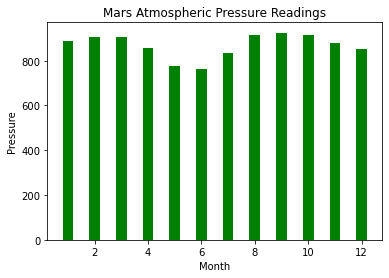

 Highest Pressure noted in Month 9 at 925
 Lowest Pressure noted in Month 5 at 727


In [23]:
#Answer the following question: Which months have the lowest and the highest atmospheric pressure on 
dfPressure=df[['month', 'pressure']].copy()
# creating the bar plot
plt.bar(dfPressure['month'], dfPressure['pressure'], color ='green',
        width = 0.4)
 
plt.xlabel("Month")
plt.ylabel("Pressure")
plt.title("Mars Atmospheric Pressure Readings")
plt.show()
print(f" Highest Pressure noted in Month 9 at 925")
print(f" Lowest Pressure noted in Month 5 at 727")

# Q: About how many terrestrial (Earth) days exist in a Martian year? 

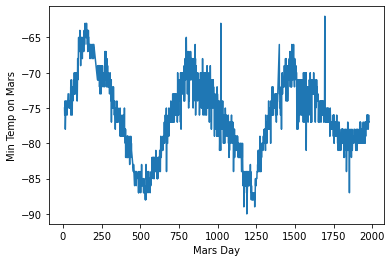

 First lowest temp noted at sol 500, next lowest temp noted at about sol 1200: Estimated Martian Year is 700 days


In [24]:
#Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually 
#estimate the result by plotting the daily minimum temperature.
#get temp and sol alone in a dataframe
dfYear=df[['sol', 'min_temp']].copy()
plt.xlabel("Mars Day")
plt.ylabel("Min Temp on Mars")
x_axis=dfYear['sol']
e_x=dfYear['min_temp']

plt.plot(x_axis, e_x)
plt.show()
#appears about 500 sol to 1200 sol are the low temps, making a martian year about 700 days
print(f" First lowest temp noted at sol 500, next lowest temp noted at about sol 1200: Estimated Martian Year is 700 days")

# Export the DataFrame to a CSV file.

In [25]:
df.to_csv('./resources/mars_weather.csv')

In [26]:
#Quit the browser
browser.quit()